In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pickle

from flygym.envs.nmf_mujoco import MuJoCoParameters
from flygym.arena.mujoco_arena import FlatTerrain
import flygym.util.vision as vision
from odor_vision import ObstacleOdorArena, NMFObservation

import datetime


In [4]:
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True, enable_olfaction=True)

save_path = "../../data"
num_pos = 20
steps = 1

In [5]:
dataset = []

for f in trange(num_pos):
    arena = ObstacleOdorArena()
    spawn_pos = (np.random.randint(-1,25),np.random.randint(-12,12),0.5)
    spawn_orient = (0,0,1,np.random.random()*2*np.pi)
    sim = NMFObservation(
        sim_params=sim_params,
        arena=arena,
        obj_threshold=50,
        spawn_pos=spawn_pos,
        spawn_orient=spawn_orient,
        pos_range=[[-1,25], [-12,12]]
    )

    for i in range(steps):
        obs,_,_,_,_ = sim.step([0,0])
        dataset.append(obs)

    sim.close()

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [01:44<00:00,  5.25s/it]


In [6]:
dataset = np.array(dataset)
with open(save_path+"/dataset_test.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [5]:
with open(save_path+"/dataset_test.pkl", "rb") as f:
    data = pickle.load(f)

print(data.shape)

(20, 1445)


[ 6.61524819 -5.97765259  1.        ]


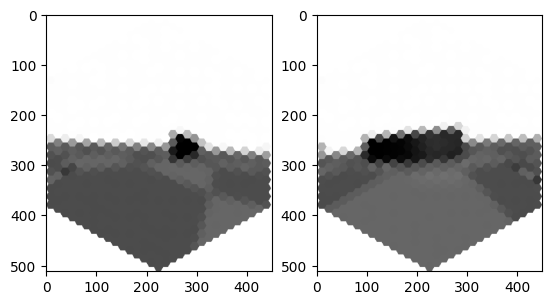

[  0.71624603 -24.99817549   1.        ]


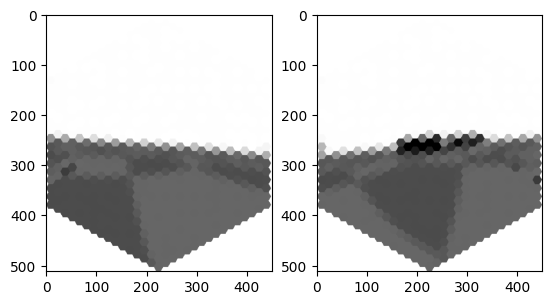

[0. 0. 0.]


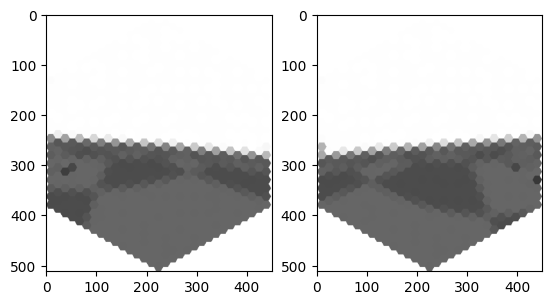

[-11.15894751  11.24087631   1.        ]


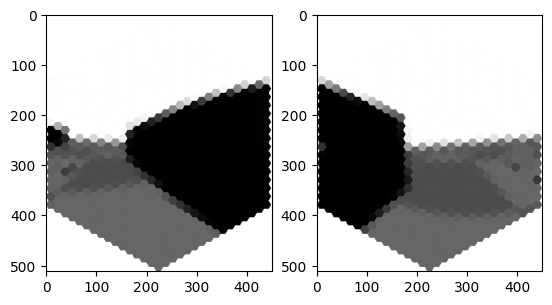

[6.46807958 7.67840749 1.        ]


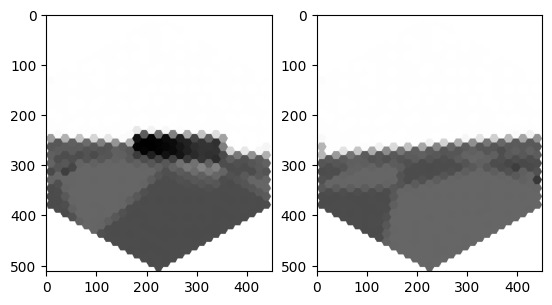

[8.38720532 6.73182639 1.        ]


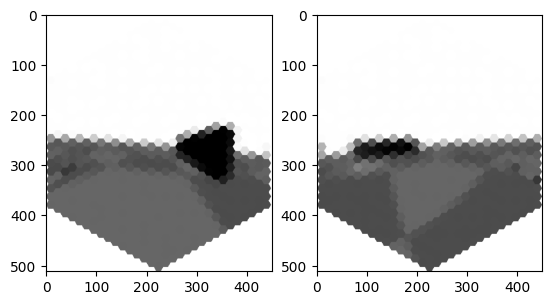

[10.34072525  4.19123891  1.        ]


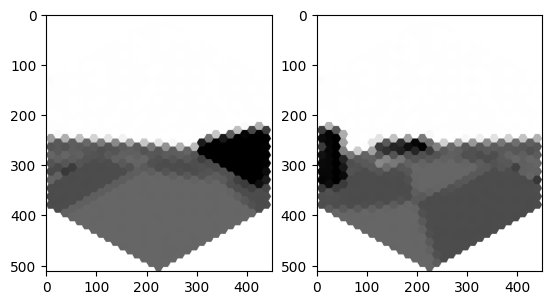

[-9.87619801 -9.83650287  1.        ]


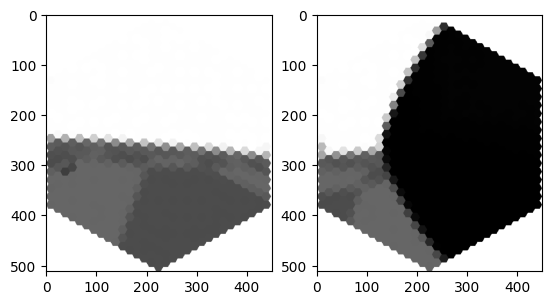

[-2.11491588 -2.36709701  1.        ]


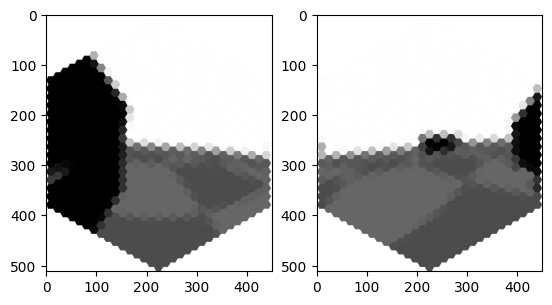

[ 7.77534476 10.45577369  1.        ]


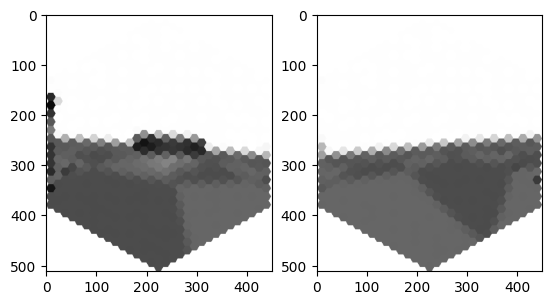

[-2.17581688  9.25123971  1.        ]


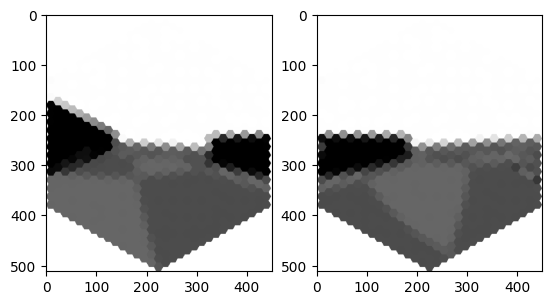

[-3.60026948 -0.47745157  1.        ]


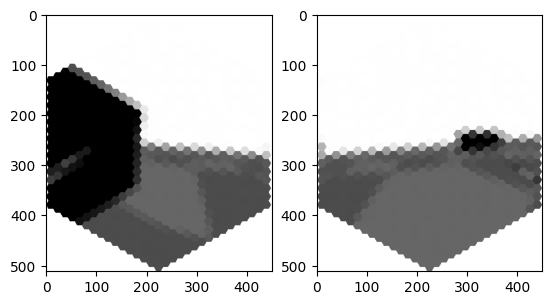

[-0.59149268  6.06733103  1.        ]


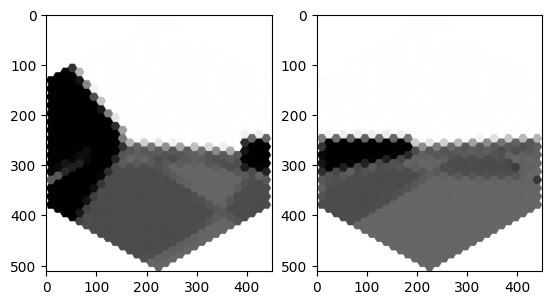

[-5.09266901  9.82669067  1.        ]


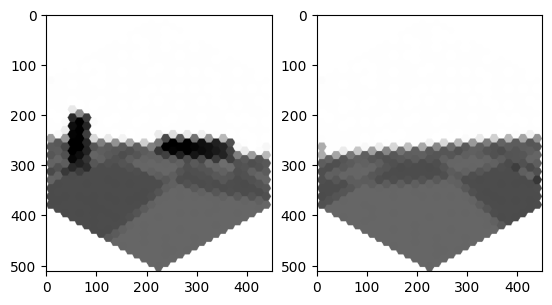

[5.7057238 2.0397534 1.       ]


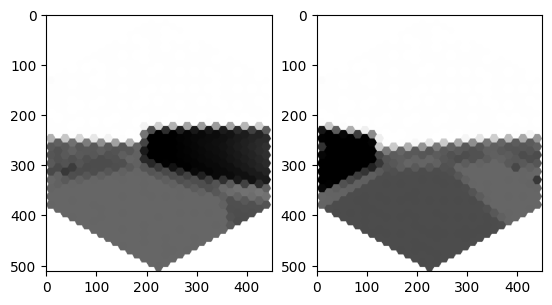

[ -7.97651392 -16.17046441   1.        ]


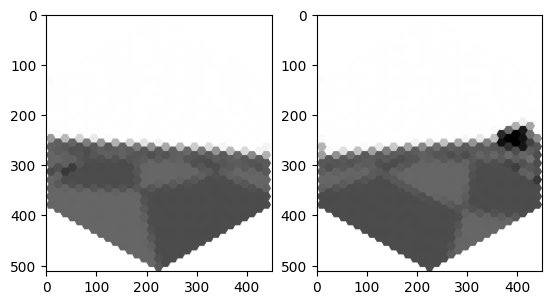

[ -6.15724509 -17.32245029   1.        ]


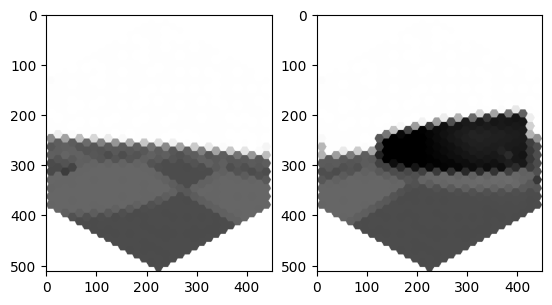

[-10.13383094  -9.09333581   1.        ]


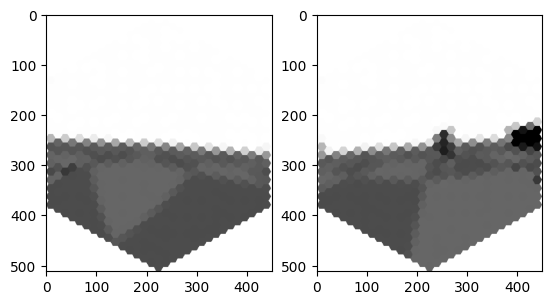

[ -2.49556736 -11.94340297   1.        ]


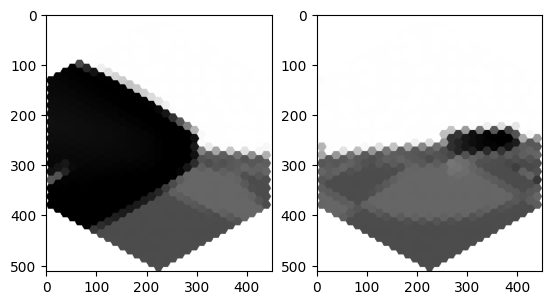

[-4.36666926  5.1273433   1.        ]


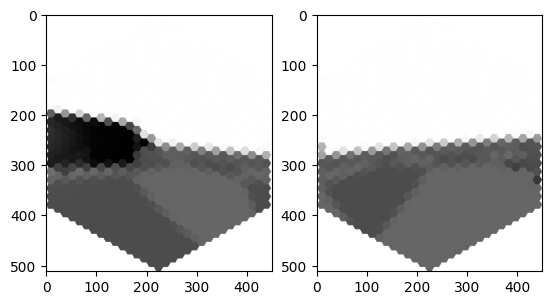

In [9]:
for sample in data:
    vis = sample[:-3]
    features = sample[-3:]
    print(features)

    vis_input = np.array(vis)
    vis_input = np.reshape(vis_input, (2,-1))
    vis_input = np.stack((255*vis_input, np.zeros_like(vis_input)), axis=2)
    hr = vision.hex_pxls_to_human_readable(vis_input[0,:,:], vision.ommatidia_id_map)
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(hr, cmap="gray", vmin=0, vmax=255)
    hr = vision.hex_pxls_to_human_readable(vis_input[1,:,:], vision.ommatidia_id_map)
    ax[1].imshow(hr, cmap="gray", vmin=0, vmax=255)
    plt.show()
    